<a href="https://colab.research.google.com/github/windapratiwi215/data-science-Project-Final-Airline-Passenger-Satisfaction-Prediction/blob/main/Revisi_DS_27_Project_Final_Airline_Passenger_Satisfaction_Prediction_ZARRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Passenger Satisfaction ML Model

created by: ZARRA Team

>**objective**:
1. Building end-to-end data science project from data preparation until machine learning model
2. Building API for machine learning model
3. Deploy machine learning model in Streamlit

>**About dataset**:
The dataset contains the results of an airline passenger satisfaction survey. The objective of this dataset is to **identify factors that are highly correlated** with passenger satisfaction (or dissatisfaction). Additionally, the dataset can be utilized to build a** machine learning model that predicts **the level of passenger satisfaction.

# Data Preparation

In [ ]:
!pip install category_encoders
!pip install dataprep


In [ ]:
# import library
import pandas as pd
import numpy as np

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import machine learning model
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle
from sklearn.preprocessing import RobustScaler


from sklearn.datasets import make_classification
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from dataprep.eda import plot, plot_missing, plot_correlation, plot_diff, create_report

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")


In [ ]:
# Load Train set
df_train = pd.read_csv("https://raw.githubusercontent.com/windapratiwi215/data_science_Project_Final_Airline_Passenger_Satisfaction_Prediction_ZARRA/main/Dataset/Airline%20Passenger%20Satisfaction/train.csv")
print(f"Train set shape:\n{df_train.shape}\n")


Train set shape:
(103904, 25)



In [ ]:
# info of each of the variables in our train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


The columns **Unnamed** and **id** are not necessary and will not be used in the analysis.

In [ ]:
df_train = df_train.iloc[:,2:]

In [ ]:
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# explore any duplicate values and missing values
print(f'Dataset dimensions\t: {df_train.shape}')
print(f'Rows duplicated\t\t: {df_train.duplicated().sum()}')

type_null = pd.DataFrame(df_train.dtypes).T.rename(index = {0: 'Columns Type'})
type_null = type_null.append(pd.DataFrame(df_train.isnull().sum()).T.rename(index = {0: 'Amount of Null Values'}))
type_null = type_null.append(pd.DataFrame(round(df_train.isnull().sum()/df_train.shape[0]*100,2)).T.rename(index = {0: 'Percentage of Null Values'}))
type_null = type_null.T
type_null = type_null.reset_index().rename(columns={'index':'feature'})
type_null

Dataset dimensions	: (103904, 23)
Rows duplicated		: 0


,feature,Columns Type,Amount of Null Values,Percentage of Null Values
0,Gender,object,0,0.0
1,Customer Type,object,0,0.0
2,Age,int64,0,0.0
3,Type of Travel,object,0,0.0
4,Class,object,0,0.0
5,Flight Distance,int64,0,0.0
6,Inflight wifi service,int64,0,0.0
7,Departure/Arrival time convenient,int64,0,0.0
8,Ease of Online booking,int64,0,0.0
9,Gate location,int64,0,0.0


Insight:
*  There are no duplicate data.
*  There are missing values in the column **Arrival Delay in Minutes**, and they will be replaced with the **median value** of that column.


# Exploratory Data Analysis


- **Univariate Analysis**
  1. What is the composition of gender in the dataset (Gender Composition)?
  2. How is the distribution of customer types in the dataset (Customer Type Composition)?
  3. What is the age distribution of the passengers (Age Distribution)?
  4. How is the composition of flight classes in the dataset (Class Composition)?
  5. What is the distribution of flight distances in the dataset (Flight Distance Distribution)?
  6. How is the distribution of in-flight wifi service ratings (Inflight Wifi Service Distribution)?
  7. What is the distribution of ratings for the convenience of departure/arrival times (Departure/Arrival Time Convenience Distribution)?
  8. How are the ratings distributed for the ease of online booking (Ease of Online Booking Distribution)?
  9. What is the distribution of ratings for seat comfort (Seat Comfort Distribution)?
  20. ... (continue for all other features)


- **Bivariate Analysis**
  1. What is the relationship between gender and satisfaction level?
  2. How does customer type relate to satisfaction level?


In [ ]:
# Retrieve column names
columns_name = df_train.columns

print(columns_name)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


## Univariate Analysis

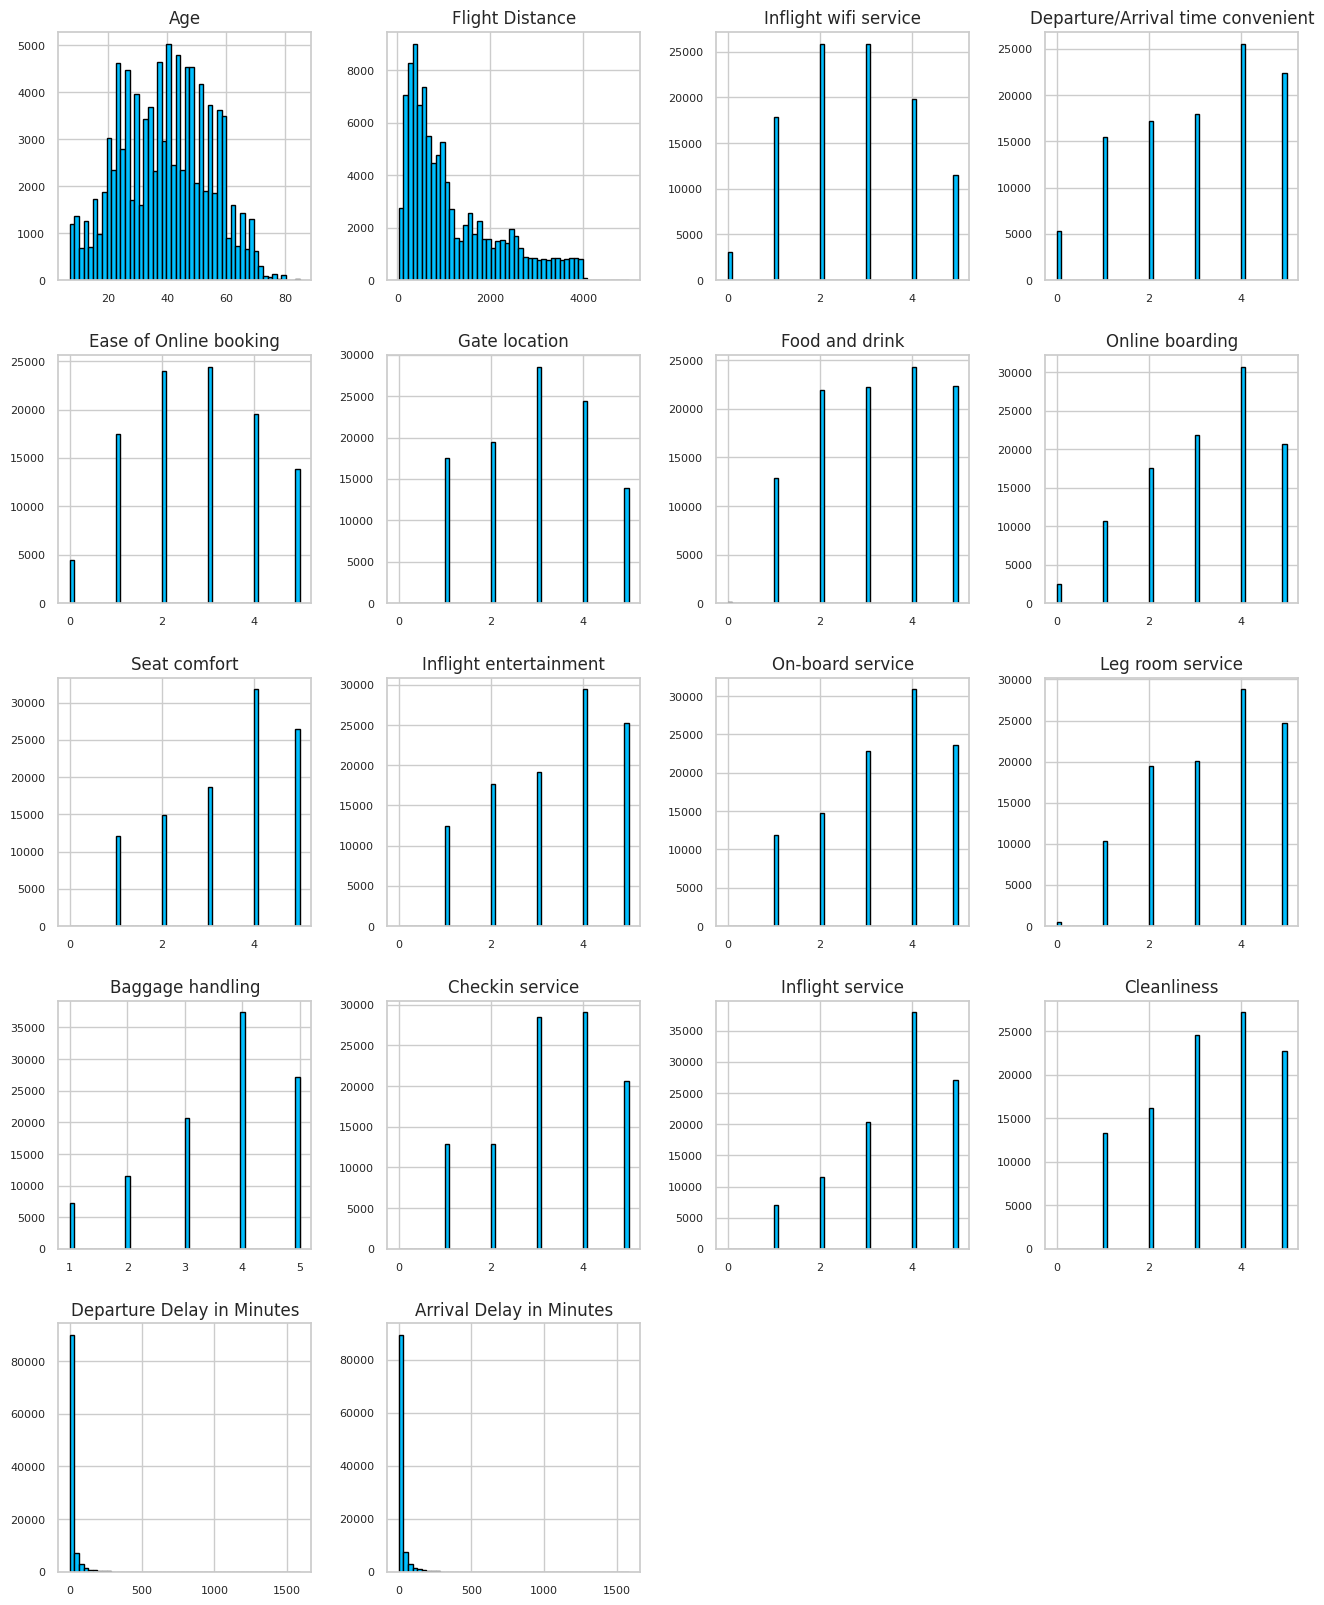

In [ ]:

# Plot the distribution of all the numerical data
fig_ = df_train.hist(
    figsize=(16, 20),
    bins=50,
    color="deepskyblue",
    edgecolor="black",
    xlabelsize=8,
    ylabelsize=8
)

In [ ]:
# Categorical to Quantitative relationship

# for-loop
categorical_features = []
for feat, feat_type in zip(df_train.columns, df_train.dtypes):
    if feat_type == 'object':
       categorical_features.append(feat)

categorical_features

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [ ]:
plot(df_train,'Gender')

In [ ]:
plot(df_train,'Customer Type')

In [ ]:
plot(df_train,'Type of Travel')



In [ ]:
plot(df_train,'Class')

## Bivariate Analysis

In [ ]:
  # 1. Hubungan Jenis Kelamin (Gender) dan Tingkat Kepuasan (satisfaction)
  plot(df_train, 'Gender', 'satisfaction')

In [ ]:
  # 2. Hubungan Inflight wifi service dan Tingkat Kepuasan (satisfaction)
  plot(df_train, 'Inflight wifi service', 'satisfaction')


In [ ]:
  plot(df_train, 'Age', 'satisfaction')

In [ ]:
  plot(df_train,'Online boarding', 'satisfaction')

In [ ]:
  plot(df_train, 'Customer Type', 'satisfaction')

In [ ]:
  plot(df_train, 'Flight Distance', 'satisfaction')

In [ ]:
  plot(df_train, 'Gate location', 'satisfaction')

In [ ]:
  # 3. Hubungan Tipe Perjalanan (Type of Travel) dan Tingkat Kepuasan (satisfaction)
  plot(df_train, 'Type of Travel', 'satisfaction')


In [ ]:

plot(df_train, 'Baggage handling', 'satisfaction')

In [ ]:
  plot(df_train, 'Class', 'satisfaction')

In [ ]:
plot(df_train, 'Inflight service', 'satisfaction')

In [ ]:
  plot(df_train, 'Seat comfort', 'satisfaction')

In [ ]:
  plot(df_train, 'Inflight entertainment', 'satisfaction')

In [ ]:
plot(df_train, 'Checkin service', 'satisfaction')

In [ ]:

plot(df_train, 'Cleanliness', 'satisfaction')

In [ ]:

plot(df_train, 'On-board service', 'satisfaction')

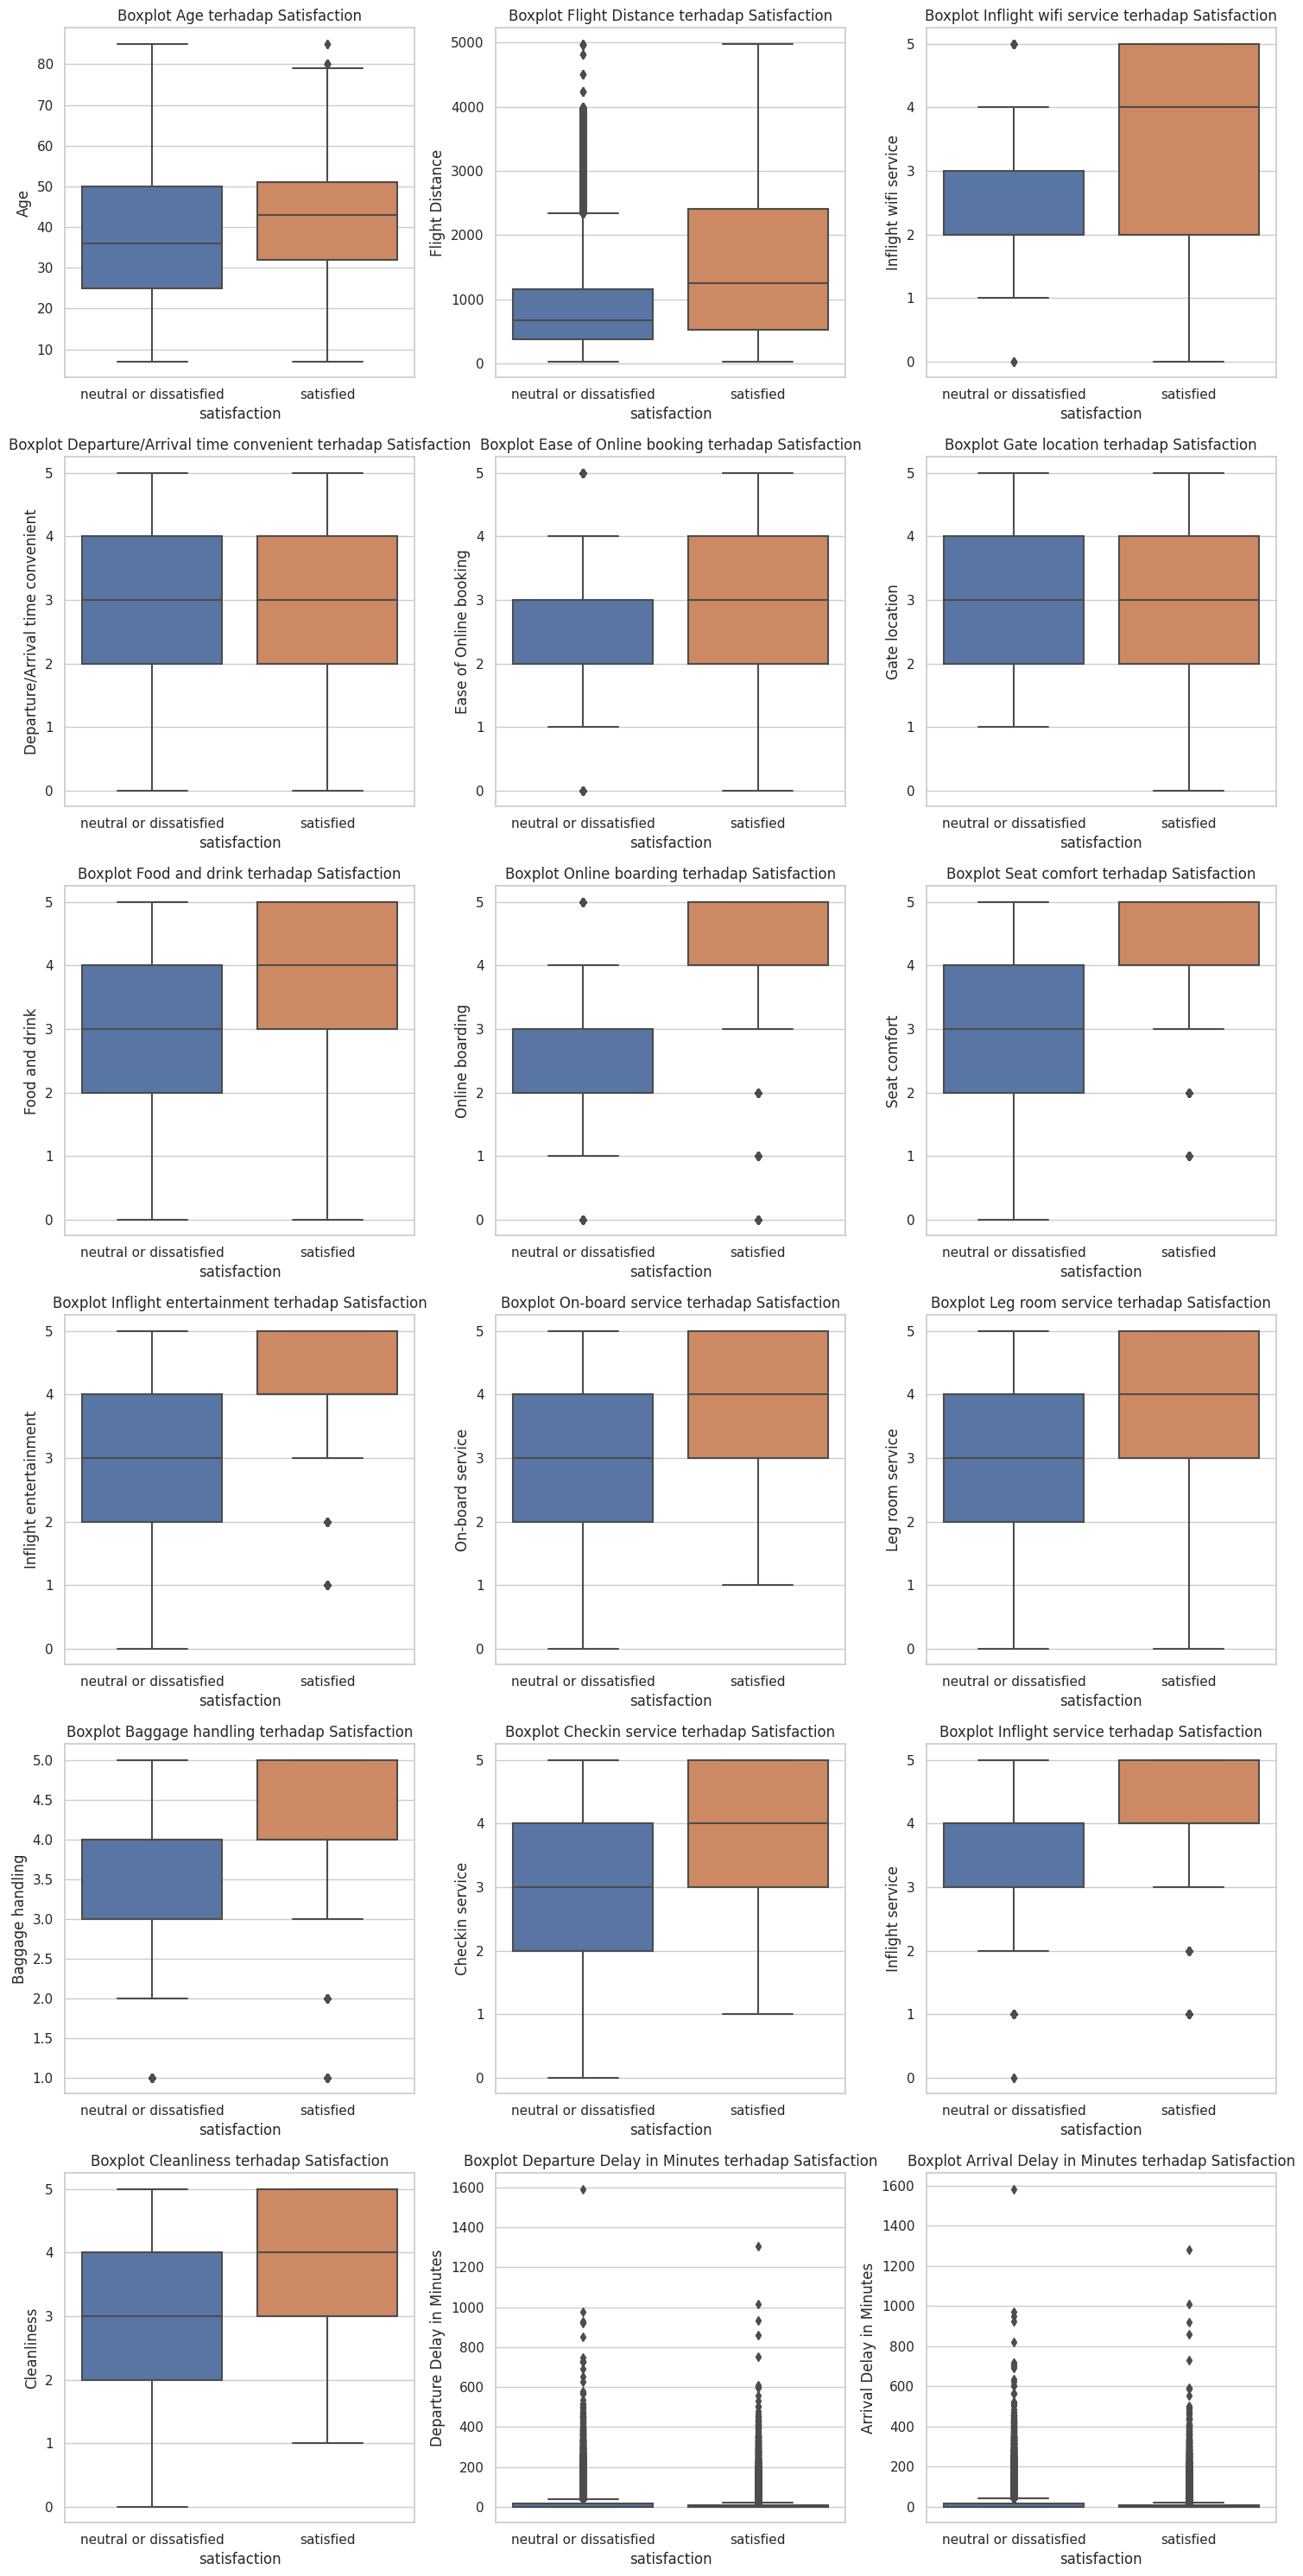

In [ ]:
# Box plot untuk feature numerik
# Ambil kolom-kolom numerik dari DataFrame
numerical_columns = df_train.select_dtypes(include=[np.number]).columns

# Hitung berapa baris dan kolom subplot yang diperlukan
num_cols = 3  # Jumlah kolom subplot dalam satu baris
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Jumlah baris subplot

# Set ukuran keseluruhan figure
plt.figure(figsize=(15, 5*num_rows))  # Sesuaikan ukuran sesuai kebutuhan

# Membuat boxplot untuk setiap kolom numerik dengan 'satisfaction' sebagai variabel kategorikal
for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(data=df_train, x='satisfaction', y=column)
    plt.title(f'Boxplot {column} terhadap Satisfaction')

# Atur tata letak dan tampilkan visualisasi
plt.tight_layout()
plt.show()

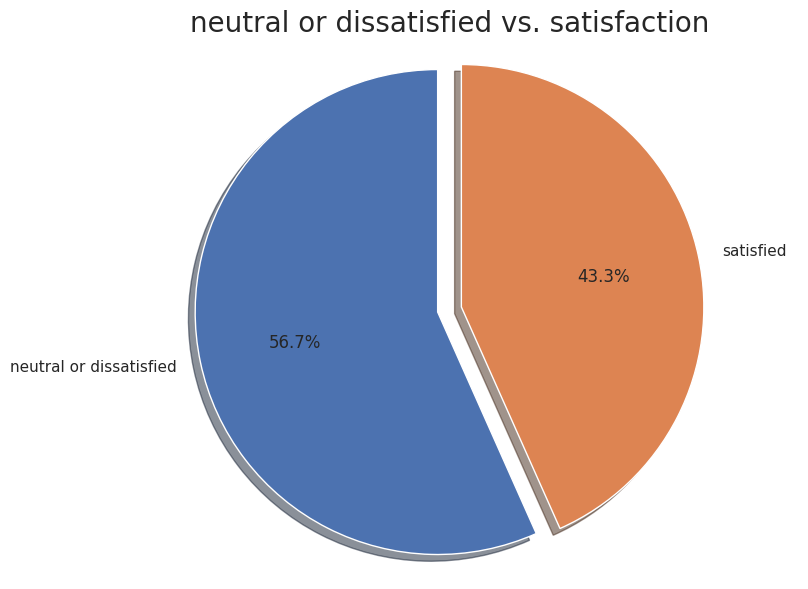

In [ ]:
# Assuming 'df_train' contains the data with the 'satisfaction' column as the target variable
labels = 'neutral or dissatisfied', 'satisfied'
sizes = [
    df_train.satisfaction[df_train['satisfaction']=='neutral or dissatisfied'].count(),
    df_train.satisfaction[df_train['satisfaction']=='satisfied'].count()
]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("neutral or dissatisfied vs. satisfaction", size=20)
plt.show()

In [ ]:
df_train.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Age,103904.0,39.379706,15.114964,7.0,14.0,27.0,40.0,51.0,59.0,64.0,70.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,175.0,414.0,843.0,1743.0,2750.0,3383.0,3882.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,1.0,2.0,3.0,4.0,5.0,5.0,5.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,0.0,2.0,3.0,4.0,5.0,5.0,5.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,1.0,2.0,3.0,4.0,5.0,5.0,5.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,1.0,2.0,3.0,4.0,5.0,5.0,5.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,1.0,2.0,3.0,4.0,5.0,5.0,5.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,1.0,2.0,3.0,4.0,5.0,5.0,5.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,1.0,2.0,4.0,5.0,5.0,5.0,5.00,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,1.0,2.0,4.0,4.0,5.0,5.0,5.00,5.0



Minimum **Inflight wifi** service = 0, so we will impute the column because 0 indicates no service.

# Data Pre-processing
- Filling null values towards:
  - *Arrival Delay in Minutes* with **median**
  - *Inflight wifi service* with **median**
- Label Encoding
  - Label Encoder  : Customer Type, Type of Travel, Class, satisfaction
  - Manual Encoder       
- SMOTE implementation

In [ ]:
data_prepro_train = df_train.copy()

# Replace 0 with NaN in 'Inflight wifi service' column
data_prepro_train['Inflight wifi service'] = data_prepro_train['Inflight wifi service'].replace(0, float('nan'))

# Check for any missing values
type_null = pd.DataFrame(data_prepro_train.dtypes).T.rename(index={0: 'Columns Type'})
type_null = type_null.append(pd.DataFrame(data_prepro_train.isnull().sum()).T.rename(index={0: 'Amount of Null Values'}))
type_null = type_null.append(pd.DataFrame(data_prepro_train.isnull().sum() / data_prepro_train.shape[0] * 100).T.rename(index={0: 'Percentage of Null Values'}))
type_null.T

,Columns Type,Amount of Null Values,Percentage of Null Values
Gender,object,0,0.0
Customer Type,object,0,0.0
Age,int64,0,0.0
Type of Travel,object,0,0.0
Class,object,0,0.0
Flight Distance,int64,0,0.0
Inflight wifi service,float64,3103,2.986411
Departure/Arrival time convenient,int64,0,0.0
Ease of Online booking,int64,0,0.0
Gate location,int64,0,0.0


In [ ]:
# Train Dataset
# Set the imputer for Arrival Delay in Minutes
imp_median = SimpleImputer(strategy='median')

# Fill the missing values for Arrival Delay in Minutes
data_prepro_train['Arrival Delay in Minutes'] = imp_median.fit_transform(data_prepro_train[['Arrival Delay in Minutes']])

# Set the imputer for Inflight wifi service
imp_median_wifi = SimpleImputer(strategy='median')

# Fill the missing values for Inflight wifi service
data_prepro_train['Inflight wifi service'] = imp_median_wifi.fit_transform(data_prepro_train[['Inflight wifi service']])

# Check for any missing values
type_null = pd.DataFrame(data_prepro_train.dtypes).T.rename(index={0: 'Columns Type'})
type_null = type_null.append(pd.DataFrame(data_prepro_train.isnull().sum()).T.rename(index={0: 'Amount of Null Values'}))
type_null = type_null.append(pd.DataFrame(data_prepro_train.isnull().sum() / data_prepro_train.shape[0] * 100).T.rename(index={0: 'Percentage of Null Values'}))
type_null.T

,Columns Type,Amount of Null Values,Percentage of Null Values
Gender,object,0,0.0
Customer Type,object,0,0.0
Age,int64,0,0.0
Type of Travel,object,0,0.0
Class,object,0,0.0
Flight Distance,int64,0,0.0
Inflight wifi service,float64,0,0.0
Departure/Arrival time convenient,int64,0,0.0
Ease of Online booking,int64,0,0.0
Gate location,int64,0,0.0


#### Delete Column no contribusion

In [ ]:
# # # delete beberapa kolom yang berkontribusi lemah--> lihat feature importance di model machine learning
data_prepro_train= data_prepro_train.drop(columns=['Gender', 'Departure Delay in Minutes', 'Food and drink',
        'Leg room service',
       'Departure/Arrival time convenient', 'Arrival Delay in Minutes',
       'Ease of Online booking'])

#Ease of Online booking dihapus karena korelasinya dengan satisfaction tidak signifikan.

### Label Encoding

In [ ]:
## data preprocessing
data_prepro_train_new = data_prepro_train.copy()

In [ ]:
data_prepro_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer Type           103904 non-null  object 
 1   Age                     103904 non-null  int64  
 2   Type of Travel          103904 non-null  object 
 3   Class                   103904 non-null  object 
 4   Flight Distance         103904 non-null  int64  
 5   Inflight wifi service   103904 non-null  float64
 6   Gate location           103904 non-null  int64  
 7   Online boarding         103904 non-null  int64  
 8   Seat comfort            103904 non-null  int64  
 9   Inflight entertainment  103904 non-null  int64  
 10  On-board service        103904 non-null  int64  
 11  Baggage handling        103904 non-null  int64  
 12  Checkin service         103904 non-null  int64  
 13  Inflight service        103904 non-null  int64  
 14  Cleanliness         

In [ ]:
# Kolom-kolom yang ingin di-encode dengan Binary Encoder
# binary_encoder_columns = ['Gender']

# Kolom-kolom yang ingin di-encode dengan Label Encoder
label_encoder_columns = ['Customer Type', 'Type of Travel', 'Class', 'satisfaction']

# Menggunakan Binary Encoder pada kolom-kolom tertentu
binary_encoder = BinaryEncoder()
# data_prepro_binary_encoded = binary_encoder.fit_transform(data_prepro_train_new[binary_encoder_columns])

# Menggunakan Label Encoder pada kolom-kolom tertentu
label_encoder = LabelEncoder()
for column in label_encoder_columns:
    data_prepro_train_new[column] = label_encoder.fit_transform(data_prepro_train_new[column])

# Menggabungkan hasil encoding Binary Encoder dengan DataFrame asli
data_prepro_train_new = pd.concat([ data_prepro_train_new[label_encoder_columns]], axis=1)

# Tampilkan hasil encoding
data_prepro_train_new.head()



,Customer Type,Type of Travel,Class,satisfaction
0,0,1,2,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,0
4,0,0,0,1


In [ ]:
data_prepro_train_combined = pd.concat([data_prepro_train_new, data_prepro_train], axis=1)

In [ ]:
data_prepro_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer Type           103904 non-null  int64  
 1   Type of Travel          103904 non-null  int64  
 2   Class                   103904 non-null  int64  
 3   satisfaction            103904 non-null  int64  
 4   Customer Type           103904 non-null  object 
 5   Age                     103904 non-null  int64  
 6   Type of Travel          103904 non-null  object 
 7   Class                   103904 non-null  object 
 8   Flight Distance         103904 non-null  int64  
 9   Inflight wifi service   103904 non-null  float64
 10  Gate location           103904 non-null  int64  
 11  Online boarding         103904 non-null  int64  
 12  Seat comfort            103904 non-null  int64  
 13  Inflight entertainment  103904 non-null  int64  
 14  On-board service    

In [ ]:
# Menyeimbangkan data menggunakan SMOTE
X = data_prepro_train_combined.select_dtypes(exclude=['object']).drop(columns="satisfaction")
y = data_prepro_train_combined.select_dtypes(include=['number'])['satisfaction']

print("Jumlah sampel sebelum SMOTE:", Counter(y))

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Jumlah sampel setelah SMOTE:", Counter(y_resampled))

Jumlah sampel sebelum SMOTE: Counter({0: 58879, 1: 45025})
Jumlah sampel setelah SMOTE: Counter({0: 58879, 1: 58879})


In [ ]:
# Separating dependent and independent variable
X = data_prepro_train_combined.select_dtypes(exclude=['object']).drop(columns="satisfaction")
y = data_prepro_train_combined.select_dtypes(include=['number'])['satisfaction']
# Memisahkan data menjadi data pelatihan dan data pengujian menggunakan data yang sudah balace
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# # X_train.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer Type           103904 non-null  int64  
 1   Type of Travel          103904 non-null  int64  
 2   Class                   103904 non-null  int64  
 3   Age                     103904 non-null  int64  
 4   Flight Distance         103904 non-null  int64  
 5   Inflight wifi service   103904 non-null  float64
 6   Gate location           103904 non-null  int64  
 7   Online boarding         103904 non-null  int64  
 8   Seat comfort            103904 non-null  int64  
 9   Inflight entertainment  103904 non-null  int64  
 10  On-board service        103904 non-null  int64  
 11  Baggage handling        103904 non-null  int64  
 12  Checkin service         103904 non-null  int64  
 13  Inflight service        103904 non-null  int64  
 14  Cleanliness         

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 103904 entries, 0 to 103903
Series name: satisfaction
Non-Null Count   Dtype
--------------   -----
103904 non-null  int64
dtypes: int64(1)
memory usage: 811.9 KB


### Manual Encoding

In [ ]:
data_prepro_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer Type           103904 non-null  object 
 1   Age                     103904 non-null  int64  
 2   Type of Travel          103904 non-null  object 
 3   Class                   103904 non-null  object 
 4   Flight Distance         103904 non-null  int64  
 5   Inflight wifi service   103904 non-null  float64
 6   Gate location           103904 non-null  int64  
 7   Online boarding         103904 non-null  int64  
 8   Seat comfort            103904 non-null  int64  
 9   Inflight entertainment  103904 non-null  int64  
 10  On-board service        103904 non-null  int64  
 11  Baggage handling        103904 non-null  int64  
 12  Checkin service         103904 non-null  int64  
 13  Inflight service        103904 non-null  int64  
 14  Cleanliness         

In [ ]:
## data preprocessing
data_prepro_train_new = data_prepro_train.copy()

In [ ]:
gen = {'Male':0, 'Female':1}
sat = {'neutral or dissatisfied':0, 'satisfied':1}
custype = {'disloyal Customer':0, 'Loyal Customer':1}
tot = {'Personal Travel':0, "Business travel":1}
class_encoded = {'Eco':0, 'Eco Plus':1, 'Business':2}


# replacing
data_prepro_train_new = data_prepro_train_new.replace({'Gender':gen, 'Customer Type':custype,
                                                                 'Type of Travel':tot,'Class':class_encoded, 'satisfaction':sat})


In [ ]:
data_prepro_train_new.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Gate location,Online boarding,Seat comfort,Inflight entertainment,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,13,0,1,460,3.0,1,3,5,5,4,4,4,5,5,0
1,0,25,1,2,235,3.0,3,3,1,1,1,3,1,4,1,0
2,1,26,1,2,1142,2.0,2,5,5,5,4,4,4,4,5,1
3,1,25,1,2,562,2.0,5,2,2,2,2,3,1,4,2,0
4,1,61,1,2,214,3.0,3,5,5,3,3,4,3,3,3,1


In [ ]:
# Menyeimbangkan data menggunakan SMOTE
X = data_prepro_train_new.select_dtypes(exclude=['object']).drop(columns="satisfaction")
y = data_prepro_train_new.select_dtypes(include=['number'])['satisfaction']

print("Jumlah sampel sebelum SMOTE:", Counter(y))

# Scaling data sebelum melakukan SMOTE
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Oversampling dengan SMOTE setelah scaling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Jumlah sampel setelah SMOTE:", Counter(y_resampled))

# Pemisahan data setelah melakukan SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Jumlah sampel sebelum SMOTE: Counter({0: 58879, 1: 45025})
Jumlah sampel setelah SMOTE: Counter({0: 58879, 1: 58879})


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer Type           103904 non-null  int64  
 1   Age                     103904 non-null  int64  
 2   Type of Travel          103904 non-null  int64  
 3   Class                   103904 non-null  int64  
 4   Flight Distance         103904 non-null  int64  
 5   Inflight wifi service   103904 non-null  float64
 6   Gate location           103904 non-null  int64  
 7   Online boarding         103904 non-null  int64  
 8   Seat comfort            103904 non-null  int64  
 9   Inflight entertainment  103904 non-null  int64  
 10  On-board service        103904 non-null  int64  
 11  Baggage handling        103904 non-null  int64  
 12  Checkin service         103904 non-null  int64  
 13  Inflight service        103904 non-null  int64  
 14  Cleanliness         

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 103904 entries, 0 to 103903
Series name: satisfaction
Non-Null Count   Dtype
--------------   -----
103904 non-null  int64
dtypes: int64(1)
memory usage: 811.9 KB


In [ ]:
# Membuat DataFrame dari X_train
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Menampilkan isi DataFrame X_train_df
X_train_df.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Gate location,Online boarding,Seat comfort,Inflight entertainment,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.0,-0.286842,0.0,-0.500000,-0.566029,1.0,0.942104,1.0,0.333333,0.5,0.0,-0.942104,1.0,-0.557896,1.0
1,0.0,0.500000,-1.0,-0.500000,0.149737,0.0,-1.000000,0.0,-0.333333,-1.0,0.5,0.000000,1.0,0.500000,-0.5
2,-1.0,-0.732790,0.0,0.086958,-0.519645,0.0,-0.206521,-1.5,0.333333,0.5,0.5,0.500000,2.0,0.500000,1.0
3,-1.0,-0.416667,0.0,0.500000,0.106847,-0.5,0.500000,-0.5,-0.666667,0.0,-0.5,0.000000,-1.0,0.000000,-0.5
4,0.0,0.125000,0.0,-0.500000,-0.012792,0.0,-0.500000,-0.5,-0.666667,-0.5,-0.5,-0.500000,-2.0,-0.500000,0.5


# Modelling & Evaluation

## Logistic Regression Model

In [ ]:
logr_model = LogisticRegression()
logr_model.fit(X_train, y_train)
y_pred = logr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))
print("Accuracy score of Logistic Regression: ", accuracy)

              precision    recall  f1-score   support

           0     0.8805    0.8699    0.8752     11749
           1     0.8721    0.8825    0.8772     11803

    accuracy                         0.8762     23552
   macro avg     0.8763    0.8762    0.8762     23552
weighted avg     0.8763    0.8762    0.8762     23552

Accuracy score of Logistic Regression:  0.8762313179347826


## Model Training

In [ ]:
def data_training(X_train, X_test, y_train, y_test):

    models = []
    models.append(('LOGR', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('XGBoost', XGBClassifier()))
    models.append(('LightGBM', LGBMClassifier()))

    res_cols = ["model", "accuracy_score", "scale_method", "0_precision", "0_recall", "1_precision", "1_recall"]
    df_result = pd.DataFrame(columns=res_cols)
    index = 0
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, digits=2, output_dict=True)
        zero_report = class_report['0']
        one_report = class_report['1']

        idx_res_values = [name, score, "NA", zero_report['precision'], zero_report['recall'], one_report['precision'], one_report['recall']]
        # df_result.at[index, res_cols] = idx_res_values
        df_result.loc[index, res_cols] = idx_res_values
        index += 1
    df_result = df_result.sort_values("accuracy_score", ascending=False).reset_index(drop=True)
    return df_result


In [ ]:
# accuration without imbalance dataset
print("Accuration accuration with imbalance dataset ")
training_result = data_training(X_train, X_test, y_train, y_test)
training_result

Accuration accuration with imbalance dataset 


,model,accuracy_score,scale_method,0_precision,0_recall,1_precision,1_recall
0,XGBoost,0.963995,NA,0.950343,0.978977,0.978426,0.949081
1,RF,0.963528,NA,0.949332,0.979147,0.978573,0.947979
2,LightGBM,0.962678,NA,0.945565,0.981701,0.981064,0.943743
3,CART,0.945185,NA,0.94677,0.943144,0.943619,0.947217
4,GBM,0.940939,NA,0.93281,0.950038,0.949335,0.931882
5,KNN,0.936863,NA,0.923629,0.952166,0.950874,0.92163
6,LOGR,0.876231,NA,0.880513,0.869946,0.87207,0.882488


### Modelling & Evaluation

In [ ]:
def basic_model(model, x_train, y_train):
  """
  Executing the machine learning model
  as a benchmark
  """

  clf = model
  return clf.fit(x_train, y_train)

In [ ]:
def evaluation(model, x_train, x_test, y_train, y_test):
  """
  evaluate the model
  """
  clf = model

  y_predict_train = clf.predict(x_train)
  y_predict_test = clf.predict(x_test)

  training_acc = accuracy_score(y_train, y_predict_train)
  testing_acc = accuracy_score(y_test, y_predict_test)

  print("Training Accuracy: {:.2}".format(training_acc))
  print("Testing Accuracy: {:.2}".format(testing_acc))

  return print(classification_report(y_test, y_predict_test))

In [ ]:
# tampilkan nama kolom yang ada di dataset
nama_kolom= X.columns
nama_kolom

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Gate location', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

In [ ]:
# LightGBM Classifier
model_grad = basic_model(LGBMClassifier(), X_train, y_train)

evaluation(model_grad, X_train, X_test, y_train, y_test)

# Get feature importance
feature_importance = model_grad.feature_importances_

# Urutkan nilai feature importance dalam urutan menaik
sorted_indices = np.argsort(feature_importance)

n = 7
# Ambil indeks fitur dengan nilai feature importance paling rendah
least_contributing_feature_index = sorted_indices[:n]

# Ambil nama kolom atau fitur berdasarkan indeks
nama_fitur_paling_rendah = nama_kolom[least_contributing_feature_index]

# Cetak hasil
print(n, "Fitur dengan kontribusi paling rendah:")
print("Nama Kolom/Fitur:", nama_fitur_paling_rendah)
print("Indeks Fitur:", least_contributing_feature_index)
print("Nilai Feature Importance:", feature_importance[least_contributing_feature_index])

Training Accuracy: 0.96
Testing Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     11749
           1       0.98      0.94      0.96     11803

    accuracy                           0.96     23552
   macro avg       0.96      0.96      0.96     23552
weighted avg       0.96      0.96      0.96     23552

7 Fitur dengan kontribusi paling rendah:
Nama Kolom/Fitur: Index(['On-board service', 'Cleanliness', 'Checkin service',
       'Inflight entertainment', 'Class', 'Seat comfort', 'Inflight service'],
      dtype='object')
Indeks Fitur: [10 14 12  9  3  8 13]
Nilai Feature Importance: [ 81  92 123 143 158 169 177]


Fitur dengan kontribusi paling tinggi:
1. Nama Kolom/Fitur: Inflight wifi service, Nilai Feature Importance: 420
2. Nama Kolom/Fitur: Online boarding, Nilai Feature Importance: 287
3. Nama Kolom/Fitur: Age, Nilai Feature Importance: 284
4. Nama Kolom/Fitur: Customer Type, Nilai Feature Importance: 230
5. Nama Kolom/Fitur: Type of Travel, Nilai Feature Importance: 225
6. Nama Kolom/Fitur: Baggage handling, Nilai Feature Importance: 211
7. Nama Kolom/Fitur: Gate location, Nilai Feature Importance: 205
8. Nama Kolom/Fitur: Flight Distance, Nilai Feature Importance: 195
9. Nama Kolom/Fitur: Inflight service, Nilai Feature Importance: 177
10. Nama Kolom/Fitur: Seat comfort, Nilai Feature Importance: 169
11. Nama Kolom/Fitur: Class, Nilai Feature Importance: 158
12. Nama Kolom/Fitur: Inflight entertainment, Nilai Feature Importance: 143
13. Nama Kolom/Fitur: Checkin service, Nilai Feature Importance: 123
14. Nama Kolom/Fitur: Cleanliness, Nilai Feature Importance: 92
15. Nama Kolom/Fitur: On

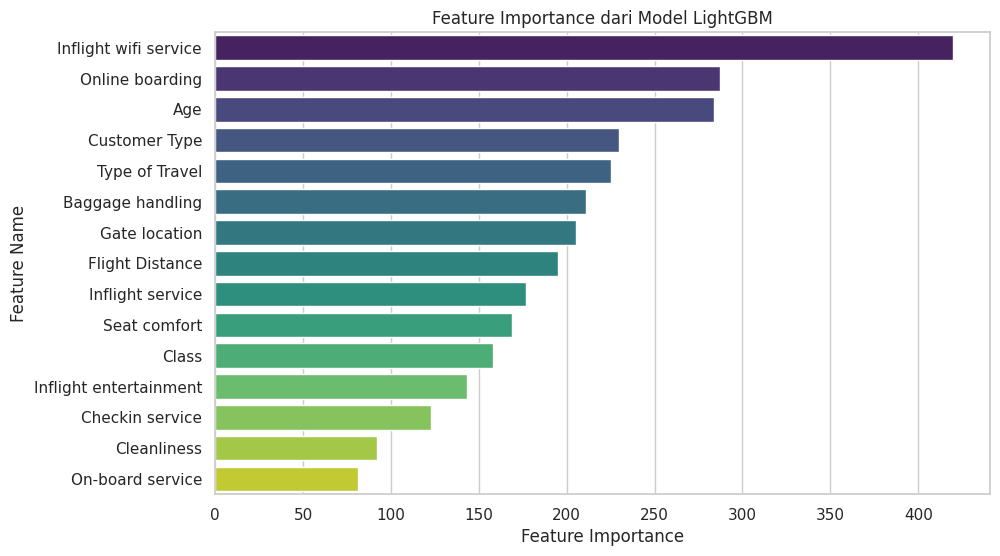

In [ ]:
# Get feature importance
feature_importance = model_grad.feature_importances_

# Ambil indeks fitur dengan nilai feature importance paling tinggi
sorted_indices = np.argsort(feature_importance)[::-1]

# Ambil nama kolom atau fitur berdasarkan indeks fitur dengan nilai feature importance paling tinggi
nama_fitur_paling_tinggi = nama_kolom[sorted_indices]

# Ambil nilai feature importance dari fitur dengan kontribusi tertinggi
nilai_fitur_paling_tinggi = feature_importance[sorted_indices]

# Cetak hasil
print("Fitur dengan kontribusi paling tinggi:")
for i in range(len(nama_fitur_paling_tinggi)):
    print(f"{i+1}. Nama Kolom/Fitur: {nama_fitur_paling_tinggi[i]}, Nilai Feature Importance: {nilai_fitur_paling_tinggi[i]}")

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=nilai_fitur_paling_tinggi, y=nama_fitur_paling_tinggi, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance dari Model LightGBM")
plt.show()

# Testing Your ML Model in API

In [ ]:
pickle.dump(model_grad, open('model_grad.pkl', 'wb'))

In [ ]:
column_streamlit = [ 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Gate location', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction']

In [ ]:
df_test = pd.read_csv("https://raw.githubusercontent.com/windapratiwi215/data_science_Project_Final_Airline_Passenger_Satisfaction_Prediction_ZARRA/main/Dataset/Airline%20Passenger%20Satisfaction/train.csv")

# Menampilkan DataFrame dengan kolom sesuai column_streamlit
data_frame_filtered = df_test[column_streamlit]

# Tampilkan DataFrame hasil filter
data_frame_filtered

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Gate location,Online boarding,Seat comfort,Inflight entertainment,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,1,3,5,5,4,4,4,5,5,neutral or dissatisfied
1,disloyal Customer,25,Business travel,Business,235,3,3,3,1,1,1,3,1,4,1,neutral or dissatisfied
2,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,4,4,4,4,5,satisfied
3,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,3,1,4,2,neutral or dissatisfied
4,Loyal Customer,61,Business travel,Business,214,3,3,5,5,3,3,4,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,disloyal Customer,23,Business travel,Eco,192,2,3,2,2,2,3,4,2,3,2,neutral or dissatisfied
103900,Loyal Customer,49,Business travel,Business,2347,4,4,4,5,5,5,5,5,5,4,satisfied
103901,disloyal Customer,30,Business travel,Business,1995,1,3,1,5,4,3,4,5,5,4,neutral or dissatisfied
103902,disloyal Customer,22,Business travel,Eco,1000,1,5,1,1,1,4,1,5,4,1,neutral or dissatisfied


In [ ]:
df_test.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000
